## Practice on Pandas and Data Visualization

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Load CSV into DataFrame
df = pd.read_csv("titanic.csv")

# Display first few rows
df.head()


Saving titanic.csv to titanic.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

df.shape

df.info()

df.describe()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- 1. What is the overall survival rate of passengers aboard the Titanic?

In [ ]:

df['Survived'].value_counts()

survival_rate = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


Overall Survival Rate: 38.38%


- 2. How does the survival rate vary by passenger class (Pclass)?

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


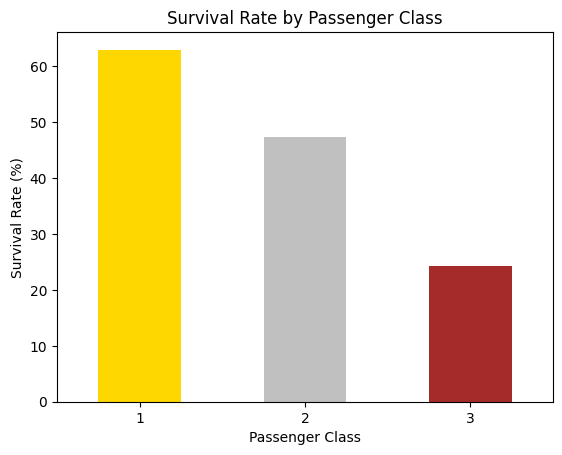

In [ ]:
import matplotlib.pyplot as plt

survival_by_class = df.groupby("Pclass")["Survived"].mean() * 100
print(survival_by_class)

survival_by_class.plot(kind="bar", color=["gold", "silver", "brown"])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=0)
plt.show()


- 3. What is the average age of passengers who survived vs. those who did not survive?

In [ ]:

avg_age_by_survival = df.groupby("Survived")["Age"].mean()
print(avg_age_by_survival)

# Pretty print
print(f"Average age of survivors    : {avg_age_by_survival[1]:.2f} years")
print(f"Average age of non-survivors: {avg_age_by_survival[0]:.2f} years")


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
Average age of survivors    : 28.34 years
Average age of non-survivors: 30.63 years


- 4. How many passengers embarked from each port (Embarked), and what are their survival rates?

Passenger counts:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 

Survival rates by Embarked (%):
 Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

Summary table:
   Embarked  passengers  survival_rate
0        C         168      55.357143
1        Q          77      38.961039
2        S         644      33.695652


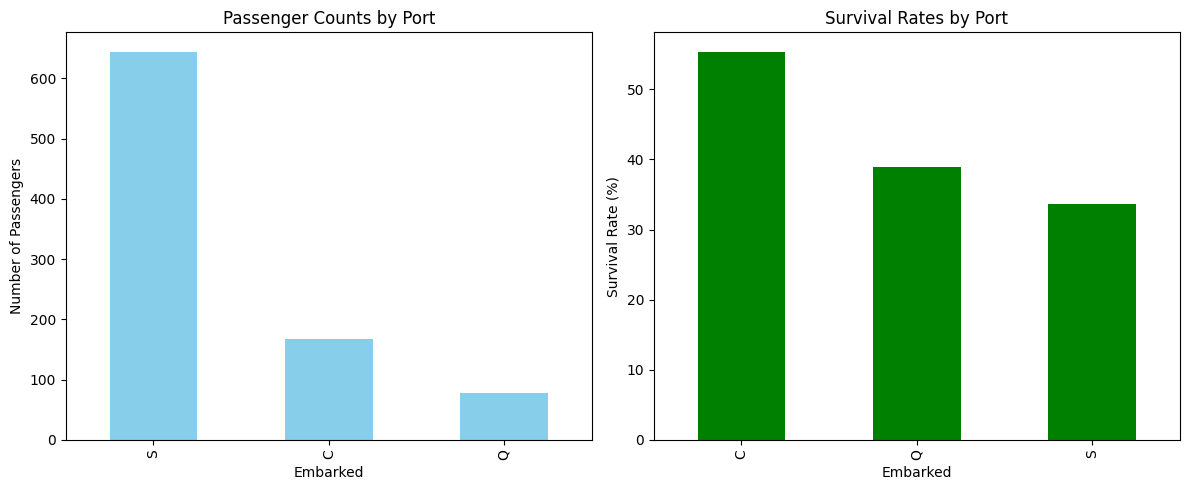

In [ ]:
# Passenger counts by Embarked
passenger_counts = df["Embarked"].value_counts()
print("Passenger counts:\n", passenger_counts, "\n")

# Survival rate by Embarked
survival_by_embarked = df.groupby("Embarked")["Survived"].mean() * 100
print("Survival rates by Embarked (%):\n", survival_by_embarked)

# Combined table
summary = df.groupby("Embarked")["Survived"].agg(
    passengers="count",
    survival_rate="mean"
).reset_index()
summary["survival_rate"] = summary["survival_rate"] * 100
print("\nSummary table:\n", summary)

# Visualization
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Bar chart - counts
passenger_counts.plot(kind="bar", ax=ax[0], color="skyblue")
ax[0].set_title("Passenger Counts by Port")
ax[0].set_ylabel("Number of Passengers")

# Bar chart - survival rate
survival_by_embarked.plot(kind="bar", ax=ax[1], color="green")
ax[1].set_title("Survival Rates by Port")
ax[1].set_ylabel("Survival Rate (%)")

plt.tight_layout()
plt.show()


- 5. What is the distribution of fare prices paid by passengers, and does fare impact survival chances?

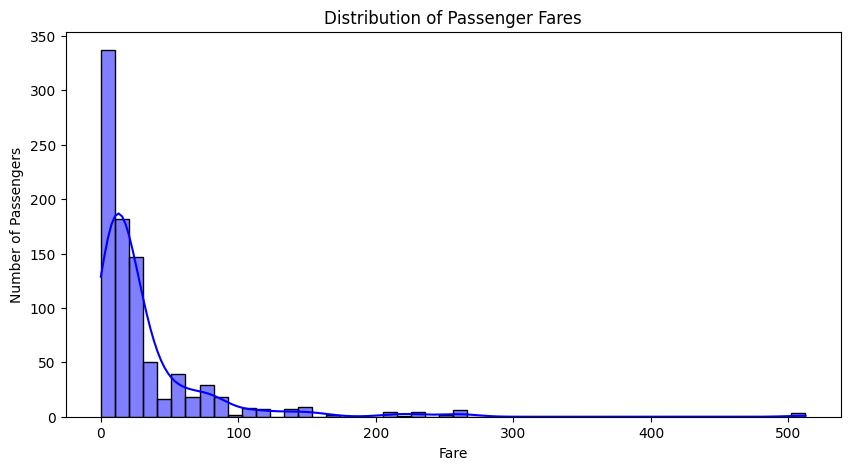

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for fares
plt.figure(figsize=(10,5))
sns.histplot(df["Fare"], bins=50, kde=True, color="blue")
plt.title("Distribution of Passenger Fares")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()


/tmp/ipython-input-2100597575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")


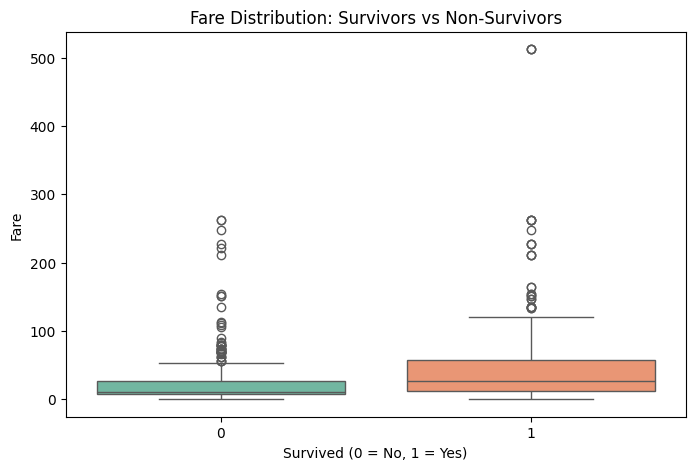

Average Fare (by survival):
 Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [ ]:
# Boxplot to compare fares by survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")
plt.title("Fare Distribution: Survivors vs Non-Survivors")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.show()

# Average fares
avg_fare_by_survival = df.groupby("Survived")["Fare"].mean()
print("Average Fare (by survival):\n", avg_fare_by_survival)


Survival rate by Fare Category (%):
 FareCategory
Low          19.730942
Medium       30.357143
High         45.495495
Very High    58.108108
Name: Survived, dtype: float64


/tmp/ipython-input-2955539609.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = df.groupby("FareCategory")["Survived"].mean() * 100


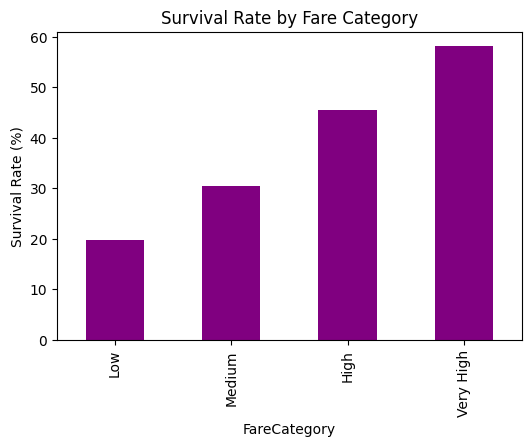

In [ ]:
# Create fare categories (bins)
df["FareCategory"] = pd.qcut(df["Fare"], 4, labels=["Low", "Medium", "High", "Very High"])

# Survival rate by fare category
survival_by_fare = df.groupby("FareCategory")["Survived"].mean() * 100
print("Survival rate by Fare Category (%):\n", survival_by_fare)

# Plot
survival_by_fare.plot(kind="bar", color="purple", figsize=(6,4))
plt.title("Survival Rate by Fare Category")
plt.ylabel("Survival Rate (%)")
plt.show()


- 6. Plot the count of passengers by passenger class (Pclass).

/tmp/ipython-input-2013511739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette="pastel")


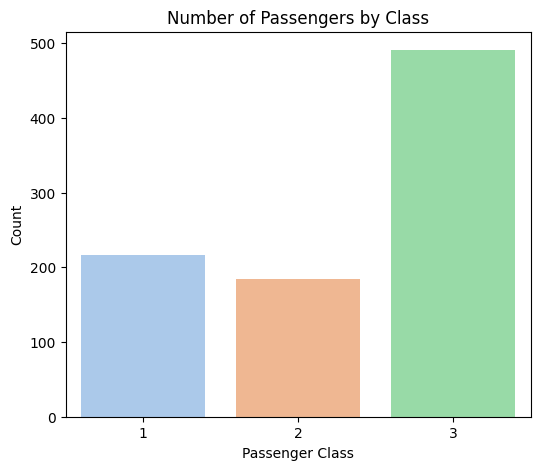

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of passengers by class
plt.figure(figsize=(6,5))
sns.countplot(x="Pclass", data=df, palette="pastel")
plt.title("Number of Passengers by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


- 7. Visualize the survival rate with respect to gender using a bar chart.

Survival rates by gender (%):
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


/tmp/ipython-input-3797229509.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, estimator=lambda x: 100*sum(x)/len(x), palette="Set2")


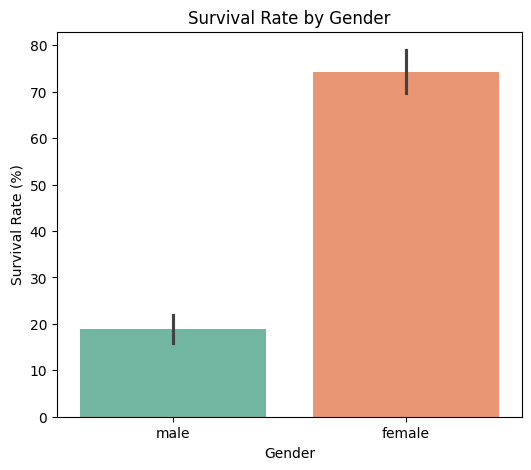

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
survival_by_gender = df.groupby("Sex")["Survived"].mean() * 100
print("Survival rates by gender (%):\n", survival_by_gender)

# Bar chart
plt.figure(figsize=(6,5))
sns.barplot(x="Sex", y="Survived", data=df, estimator=lambda x: 100*sum(x)/len(x), palette="Set2")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Gender")
plt.show()


- 8. Show the age distribution of passengers using a histogram or KDE plot.

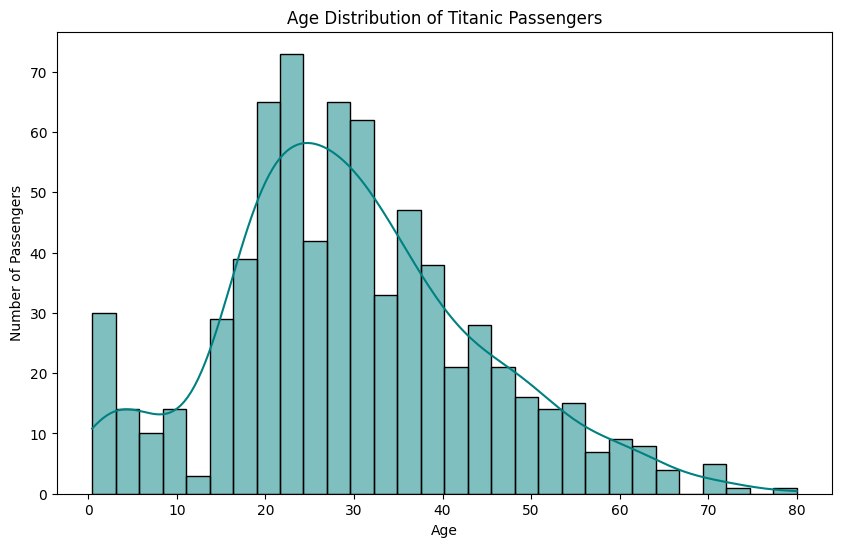

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram + KDE for age distribution
plt.figure(figsize=(10,6))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="teal")
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


- 9. Create a boxplot comparing fares across different passenger classes.

/tmp/ipython-input-3365251701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Fare", data=df, palette="Set3")


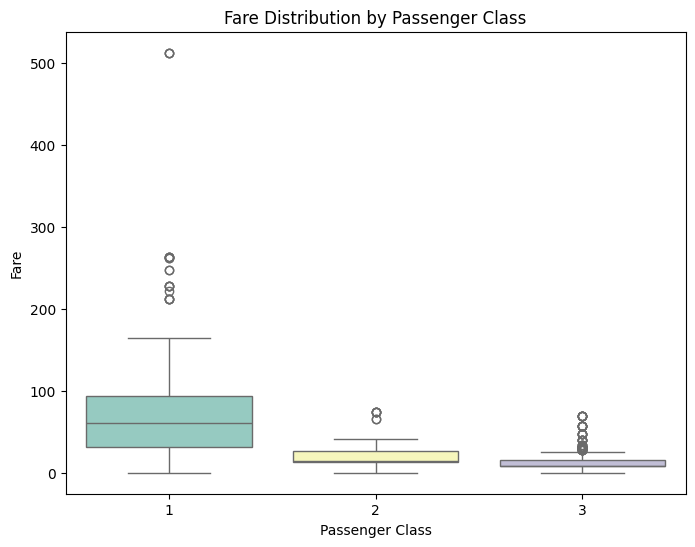

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of fares by class
plt.figure(figsize=(8,6))
sns.boxplot(x="Pclass", y="Fare", data=df, palette="Set3")
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()


- 10. Visualize survival count by embarkation port (Embarked) with a stacked bar chart.

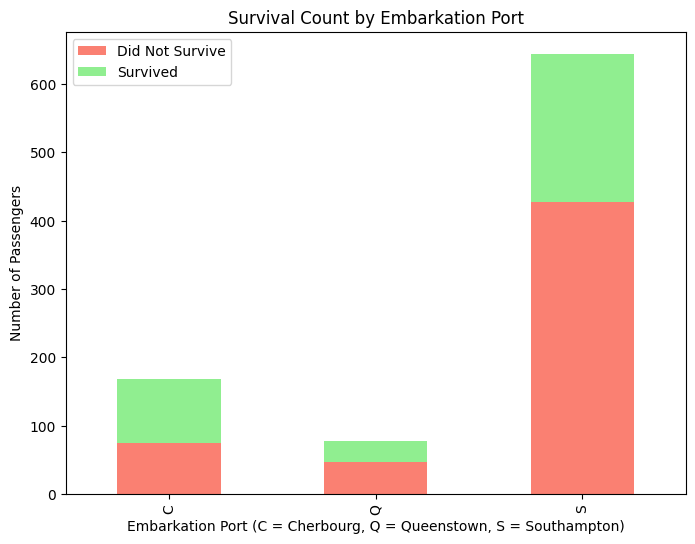

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Survival count grouped by Embarked and Survived
embarked_survival = df.groupby(["Embarked", "Survived"]).size().unstack(fill_value=0)

# Plot stacked bar chart
embarked_survival.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6),
    color=["salmon", "lightgreen"]
)

plt.title("Survival Count by Embarkation Port")
plt.xlabel("Embarkation Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Number of Passengers")
plt.legend(["Did Not Survive", "Survived"])
plt.show()



- 11. Display a heatmap of the correlation matrix of numerical features in the dataset.

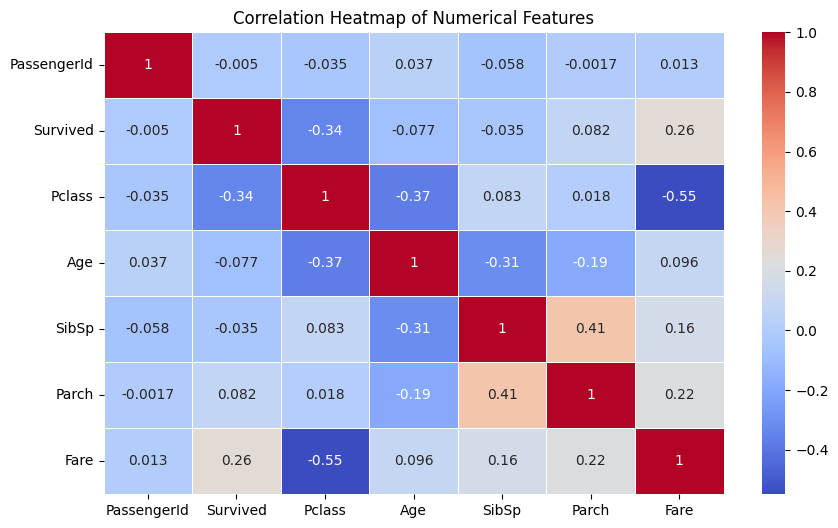

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
